In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcdefaults()

# Median Filter

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from fronts_toolbox._fields import (
    add_spikes,
    blobby_gradient,
    ideal_jet,
    sample,
    swap_noise,
)
from fronts_toolbox.filters import median_filter_xarray

## Blobby gradient

A gradient with blobs to preserve and spike noise.

In [3]:
sst_raw = blobby_gradient()
vmin = np.min(sst_raw)
vmax = np.max(sst_raw)
sst = xr.DataArray(
    add_spikes(sst_raw), name="sst", dims=("lat", "lon")
)
filtered = median_filter_xarray(sst)

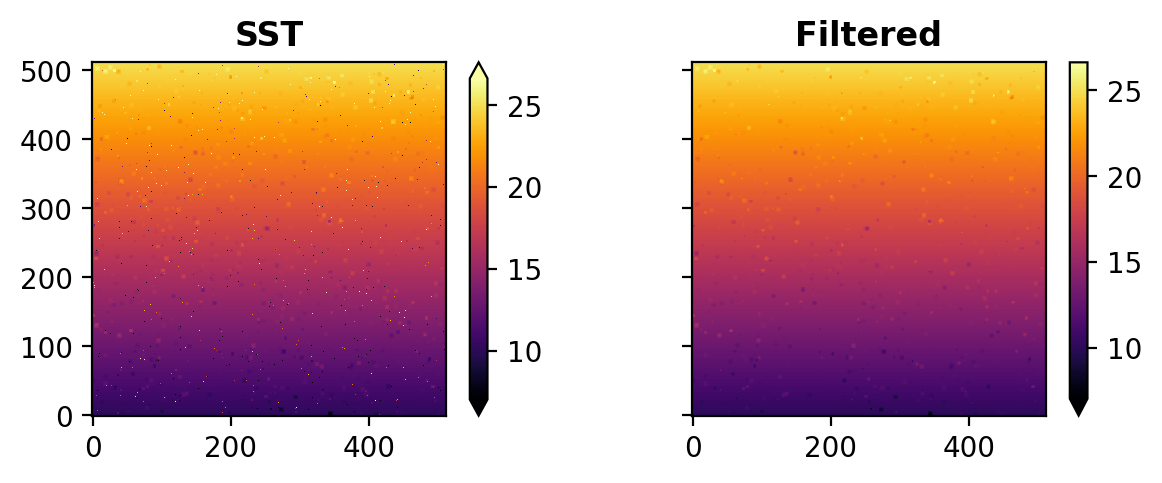

In [4]:
fig, axes = plt.subplots(
    1,
    2,
    figsize=(6, 2.3),
    layout="constrained",
    sharex=True,
    sharey=True,
    dpi=200,
)

im_kw = dict(
    cmap="inferno",
    add_labels=False,
    center=False,
    vmin=vmin,
    vmax=vmax,
)
sst.plot.imshow(ax=axes[0], **im_kw)
filtered.plot.imshow(ax=axes[1], **im_kw)

axes[0].set_title("SST", weight="bold")
axes[1].set_title("Filtered", weight="bold")

for ax in axes:
    ax.set_aspect("equal")

## Ideal Jet

A idealized meandering jets with rings, as a 2D numpy array (embeded in Xarray) with swap noise and spikes.

In [5]:
sst_raw = ideal_jet()
vmin = np.min(sst_raw)
vmax = np.max(sst_raw)
sst = xr.DataArray(
    add_spikes(swap_noise(sst_raw)), name="sst", dims=("lat", "lon")
)
filtered = median_filter_xarray(sst)

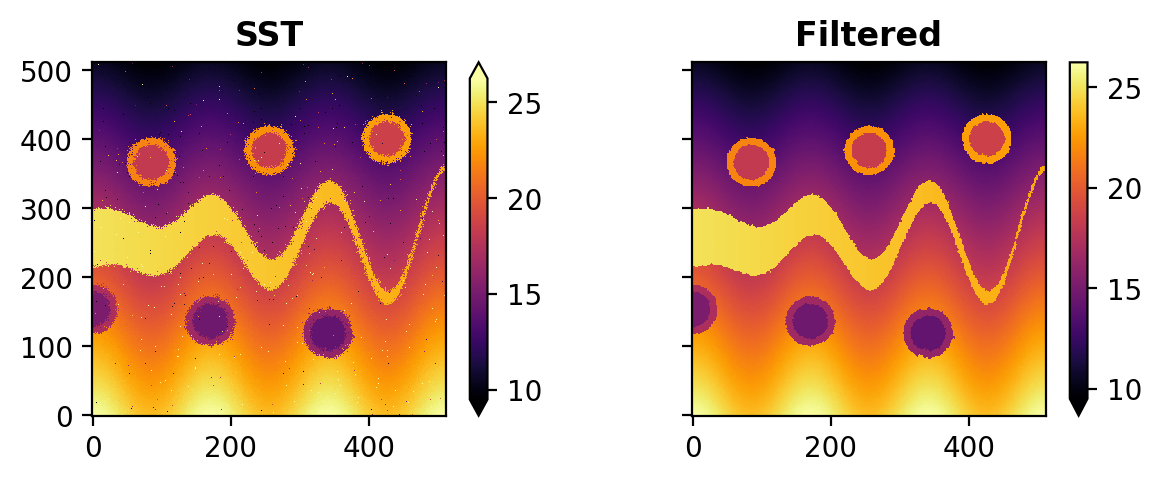

In [6]:
fig, axes = plt.subplots(
    1,
    2,
    figsize=(6, 2.3),
    layout="constrained",
    sharex=True,
    sharey=True,
    dpi=200,
)

im_kw = dict(
    cmap="inferno",
    add_labels=False,
    center=False,
    vmin=vmin,
    vmax=vmax,
)
sst.plot.imshow(ax=axes[0], **im_kw)
filtered.plot.imshow(ax=axes[1], **im_kw)

axes[0].set_title("SST", weight="bold")
axes[1].set_title("Filtered", weight="bold")

for ax in axes:
    ax.set_aspect("equal")

## MODIS Data

SST off the Californian coast, as a Dask array embeded in Xarray.

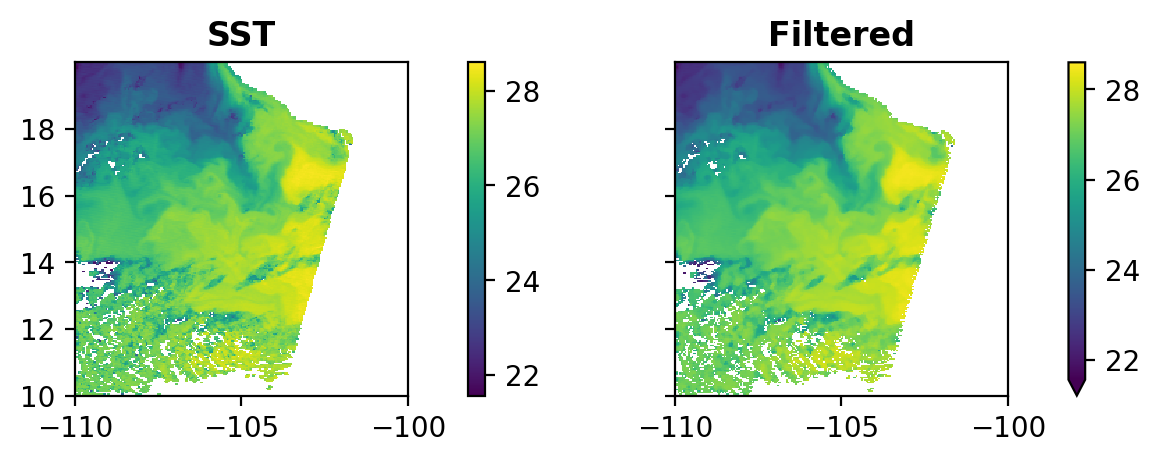

In [7]:
sst = (
    sample("MODIS")
    .sst4.isel(time=0)
    .sel(lat=slice(20, 10), lon=slice(-110, -100))
    .chunk(lat=256, lon=256)
)
filtered = median_filter_xarray(sst)

vmin = float(sst.min())
vmax = float(sst.max())

fig, axes = plt.subplots(
    1,
    2,
    figsize=(6, 2.2),
    layout="constrained",
    sharex=True,
    sharey=True,
    dpi=200,
)

im_kw = dict(
    add_labels=False,
    center=False,
    cbar_kwargs=dict(location="right", pad=0.05),
    vmin=vmin,
    vmax=vmax,
)
sst.plot.imshow(ax=axes[0], **im_kw)
filtered.plot.imshow(ax=axes[1], **im_kw)
axes[0].set_title("SST", weight="bold")
axes[1].set_title("Filtered", weight="bold")

for ax in axes:
    ax.set_aspect("equal")